In [1]:
from __future__ import print_function
import os, sys
module_path = os.path.abspath(os.path.join('../..'))
sys.path.append(module_path)

import numpy as np
import math
import copy
import pandas as pd
import scipy.stats as ss
import pickle
import matplotlib.pylab as plt
import matplotlib.patches as mpatches

## Plots

In [2]:
# Aggregation with M = 2
with open("accsPart2.pkl", "rb") as f:
    accsLRPart2 = pickle.load(f)
with open("accsAggr2.pkl", "rb") as f:
    accsLRAggr2 = pickle.load(f)

# # Aggregation with M = 4
with open("accsPart4.pkl", "rb") as f:
    accsLRPart4 = pickle.load(f)
with open("accsAggr4.pkl", "rb") as f:
    accsLRAggr4 = pickle.load(f)

# Aggregation with M = 8
with open("accsPart8.pkl", "rb") as f:
    accsLRPart8 = pickle.load(f)
with open("accsAggr8.pkl", "rb") as f:
    accsLRAggr8 = pickle.load(f)

# Aggregation with M = 16
with open("accsPart16.pkl", "rb") as f:
    accsLRPart16 = pickle.load(f)
with open("accsAggr16.pkl", "rb") as f:
    accsLRAggr16 = pickle.load(f)

# Aggregation with M = 32
with open("accsPart32.pkl", "rb") as f:
    accsLRPart32 = pickle.load(f)
with open("accsAggr32.pkl", "rb") as f:
    accsLRAggr32 = pickle.load(f)

# Aggregation with M = 64
with open("accsPart64.pkl", "rb") as f:
    accsLRPart64 = pickle.load(f)
with open("accsAggr64.pkl", "rb") as f:
    accsLRAggr64 = pickle.load(f)

# Aggregation with M = 128
with open("accsPart128.pkl", "rb") as f:
    accsLRPart128 = pickle.load(f)
with open("accsAggr128.pkl", "rb") as f:
    accsLRAggr128 = pickle.load(f)

# Single Model
with open("accsSingle.pkl", "rb") as f:
    accsLRSingle = pickle.load(f)

In [3]:
lrs = [2048, 4096, 8192]
samples = 100

In [4]:
means_single = [np.max(accsLRSingle[lr][1]) for lr in lrs]
var_single = [np.var(accsLRSingle[lr][1]) for lr in lrs]

print("Mean single models: " + str(means_single))
print("Variance single models: " + str(var_single))

Mean single models: [0.8640000000000001, 0.8603000000000001, 0.8502]
Variance single models: [4.6614440000000215e-06, 4.383755999999991e-06, 4.657135999999981e-06]


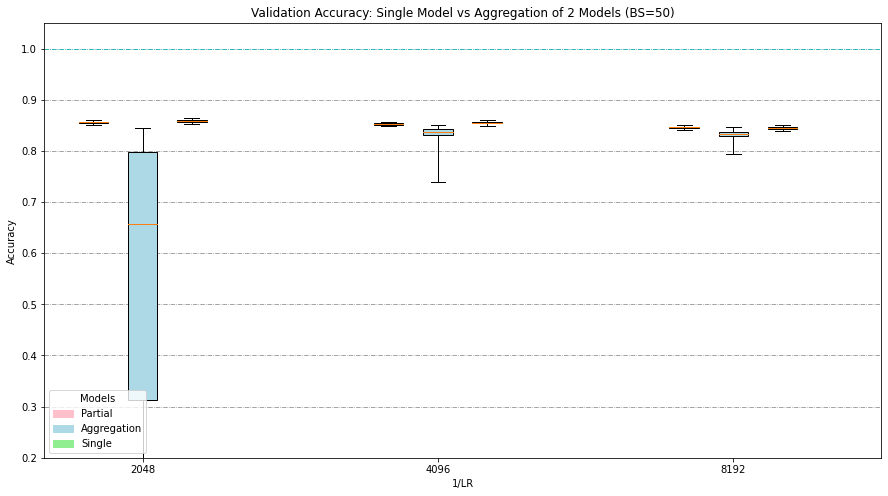

In [5]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 2 Models (BS=50)')

accsPart2 = [accsLRPart2[lr][1] for lr in lrs]
accsAggr2 = [accsLRAggr2[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part2_plot = plt.boxplot(accsPart2, positions=np.array(np.arange(len(accsPart2)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr2_plot = plt.boxplot(accsAggr2, positions=np.array(np.arange(len(accsAggr2)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [6]:
means_aggr_2 = [np.mean(accsLRAggr2[lr]) for lr in lrs]
var_aggr_2 = [np.var(accsLRAggr2[lr]) for lr in lrs]

print("Mean 2 aggregated models: " + str(means_aggr_2))
print("Variance 2 aggregated models: " + str(var_aggr_2))

diff = []
for i in range(len(means_single)):
    diff.append(np.subtract(means_aggr_2[i], means_single[i]))

print("Difference Single vs. 2 aggregated models: " + str(diff))

Mean 2 aggregated models: [0.574522, 0.8336070000000001, 0.8320909999999999]
Variance 2 aggregated models: [0.059487529116, 0.0002648612509999999, 7.741521899999986e-05]
Difference Single vs. 2 aggregated models: [-0.2894780000000001, -0.026692999999999967, -0.01810900000000004]


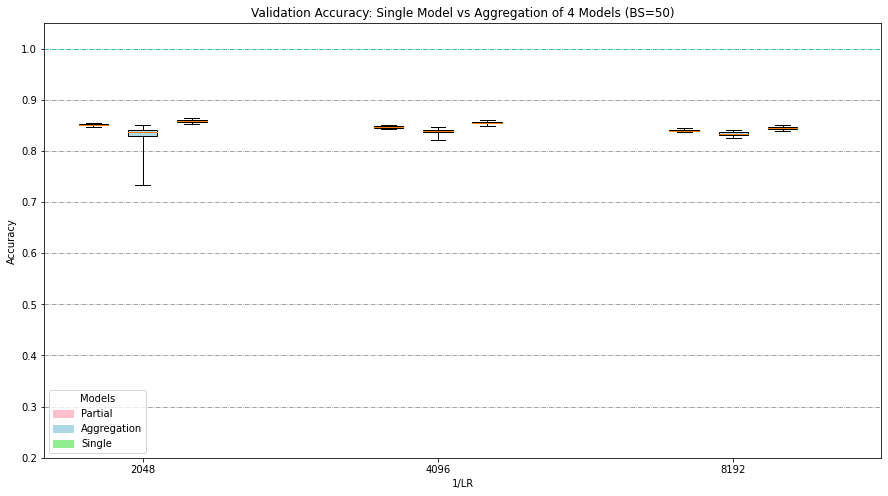

In [7]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 4 Models (BS=50)')

accsPart4 = [accsLRPart4[lr][1] for lr in lrs]
accsAggr4 = [accsLRAggr4[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part4_plot = plt.boxplot(accsPart4, positions=np.array(np.arange(len(accsPart4)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr4_plot = plt.boxplot(accsAggr4, positions=np.array(np.arange(len(accsAggr4)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [8]:
means_aggr_4 = [np.mean(accsLRAggr4[lr]) for lr in lrs]
var_aggr_4 = [np.var(accsLRAggr4[lr]) for lr in lrs]

print("Mean 4 aggregated models: " + str(means_aggr_4))
print("Variance 4 aggregated models: " + str(var_aggr_4))

diff = []
for i in range(len(means_single)):
    diff.append(np.subtract(means_aggr_4[i], means_single[i]))

print("Difference Single vs. 4 aggregated models: " + str(diff))

Mean 4 aggregated models: [0.8327849999999999, 0.8388310000000001, 0.8333799999999999]
Variance 4 aggregated models: [0.00023809607499999968, 1.6909338999999953e-05, 1.1555000000000036e-05]
Difference Single vs. 4 aggregated models: [-0.031215000000000215, -0.02146899999999996, -0.016820000000000057]


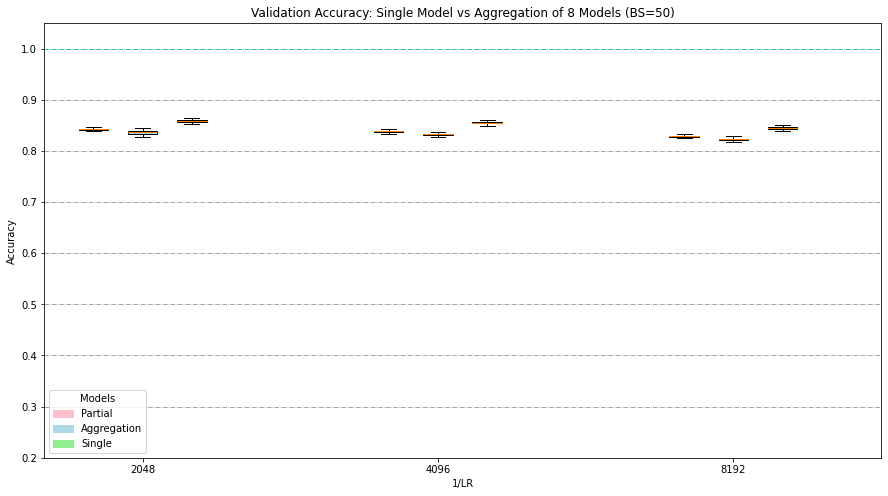

In [9]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 8 Models (BS=50)')

accsPart8 = [accsLRPart8[lr][1] for lr in lrs]
accsAggr8 = [accsLRAggr8[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part8_plot = plt.boxplot(accsPart8, positions=np.array(np.arange(len(accsPart8)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr8_plot = plt.boxplot(accsAggr8, positions=np.array(np.arange(len(accsAggr8)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [10]:
means_aggr_8 = [np.mean(accsLRAggr8[lr]) for lr in lrs]
var_aggr_8 = [np.var(accsLRAggr8[lr]) for lr in lrs]

print("Mean 8 aggregated models: " + str(means_aggr_8))
print("Variance 8 aggregated models: " + str(var_aggr_8))

diff = []
for i in range(len(means_single)):
    diff.append(np.subtract(means_aggr_8[i], means_single[i]))

print("Difference Single vs. 8 aggregated models: " + str(diff))

Mean 8 aggregated models: [0.835826, 0.8319659999999998, 0.8224589999999999]
Variance 8 aggregated models: [8.90852399999997e-06, 3.966044000000024e-06, 3.341418999999988e-06]
Difference Single vs. 8 aggregated models: [-0.028174000000000143, -0.028334000000000303, -0.027741000000000016]


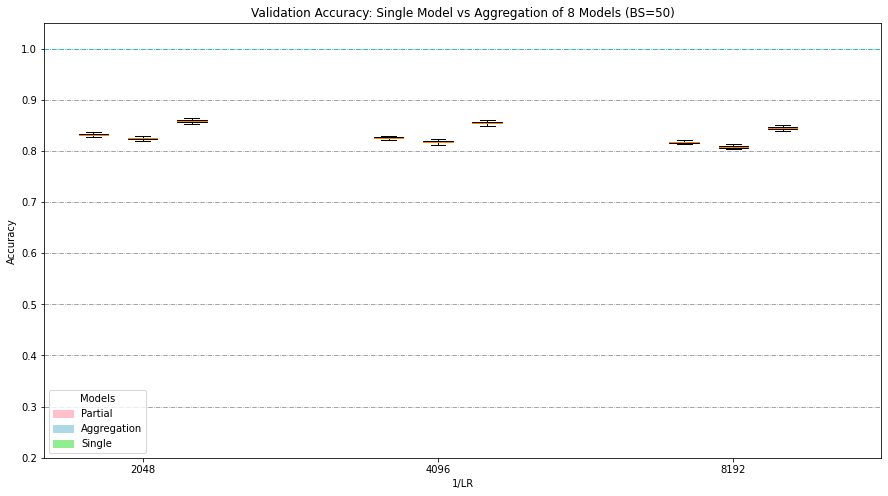

In [11]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 8 Models (BS=50)')

accsPart16 = [accsLRPart16[lr][1] for lr in lrs]
accsAggr16 = [accsLRAggr16[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part16_plot = plt.boxplot(accsPart16, positions=np.array(np.arange(len(accsPart16)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr16_plot = plt.boxplot(accsAggr16, positions=np.array(np.arange(len(accsAggr16)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [12]:
means_aggr_16 = [np.mean(accsLRAggr16[lr]) for lr in lrs]
var_aggr_16 = [np.var(accsLRAggr16[lr]) for lr in lrs]

print("Mean 16 aggregated models: " + str(means_aggr_16))
print("Variance 16 aggregated models: " + str(var_aggr_16))

diff = []
for i in range(len(means_single)):
    diff.append(np.subtract(means_aggr_16[i], means_single[i]))

print("Difference Single vs. 16 aggregated models: " + str(diff))

Mean 16 aggregated models: [0.824592, 0.8177959999999997, 0.8075220000000001]
Variance 16 aggregated models: [4.315935999999974e-06, 3.472784000000021e-06, 4.119516000000038e-06]
Difference Single vs. 16 aggregated models: [-0.03940800000000011, -0.04250400000000032, -0.04267799999999988]


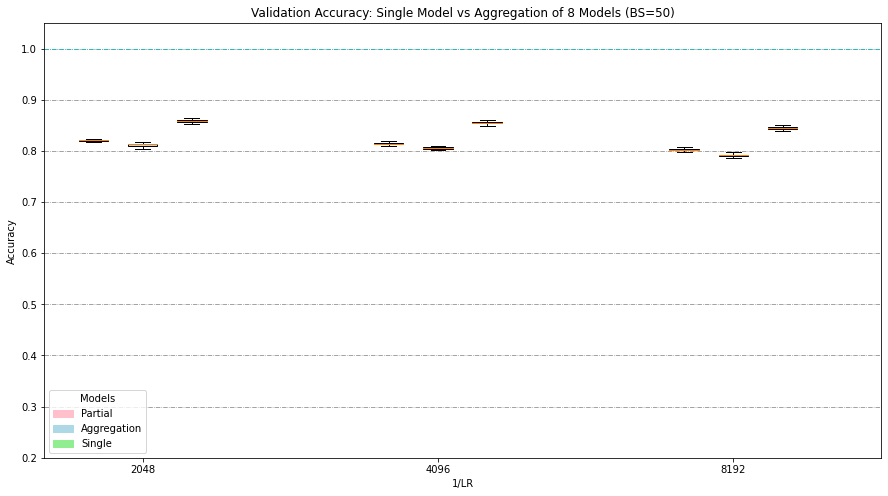

In [13]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 8 Models (BS=50)')

accsPart32 = [accsLRPart32[lr][1] for lr in lrs]
accsAggr32 = [accsLRAggr32[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part32_plot = plt.boxplot(accsPart32, positions=np.array(np.arange(len(accsPart32)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr32_plot = plt.boxplot(accsAggr32, positions=np.array(np.arange(len(accsAggr32)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [14]:
means_aggr_32 = [np.mean(accsLRAggr32[lr]) for lr in lrs]
var_aggr_32 = [np.var(accsLRAggr32[lr]) for lr in lrs]

print("Mean 32 aggregated models: " + str(means_aggr_32))
print("Variance 32 aggregated models: " + str(var_aggr_32))

diff = []
for i in range(len(means_single)):
    diff.append(np.subtract(means_aggr_32[i], means_single[i]))

print("Difference Single vs. 32 aggregated models: " + str(diff))

Mean 32 aggregated models: [0.8115289999999998, 0.8052769999999999, 0.7912349999999999]
Variance 32 aggregated models: [1.0124458999999918e-05, 3.7541710000000303e-06, 5.29887499999999e-06]
Difference Single vs. 32 aggregated models: [-0.05247100000000027, -0.055023000000000155, -0.058965000000000045]


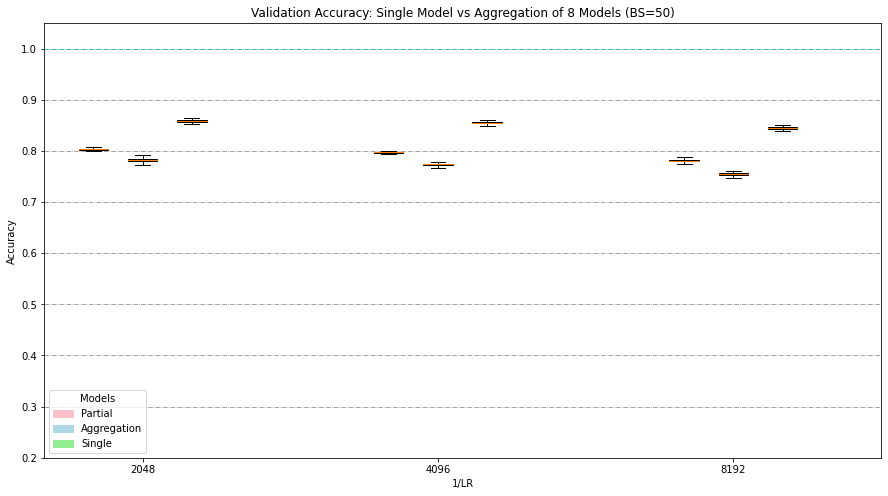

In [15]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 8 Models (BS=50)')

accsPart64 = [accsLRPart64[lr][1] for lr in lrs]
accsAggr64 = [accsLRAggr64[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part64_plot = plt.boxplot(accsPart64, positions=np.array(np.arange(len(accsPart64)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr64_plot = plt.boxplot(accsAggr64, positions=np.array(np.arange(len(accsAggr64)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [16]:
means_aggr_64 = [np.mean(accsLRAggr64[lr]) for lr in lrs]
var_aggr_64 = [np.var(accsLRAggr64[lr]) for lr in lrs]

print("Mean 64 aggregated models: " + str(means_aggr_64))
print("Variance 64 aggregated models: " + str(var_aggr_64))

diff = []
for i in range(len(means_single)):
    diff.append(np.subtract(means_aggr_64[i], means_single[i]))

print("Difference Single vs. 64 aggregated models: " + str(diff))

Mean 64 aggregated models: [0.7827679999999999, 0.7735209999999999, 0.754186]
Variance 64 aggregated models: [9.199776000000002e-06, 4.731458999999969e-06, 7.048204000000079e-06]
Difference Single vs. 64 aggregated models: [-0.08123200000000019, -0.08677900000000016, -0.09601399999999993]


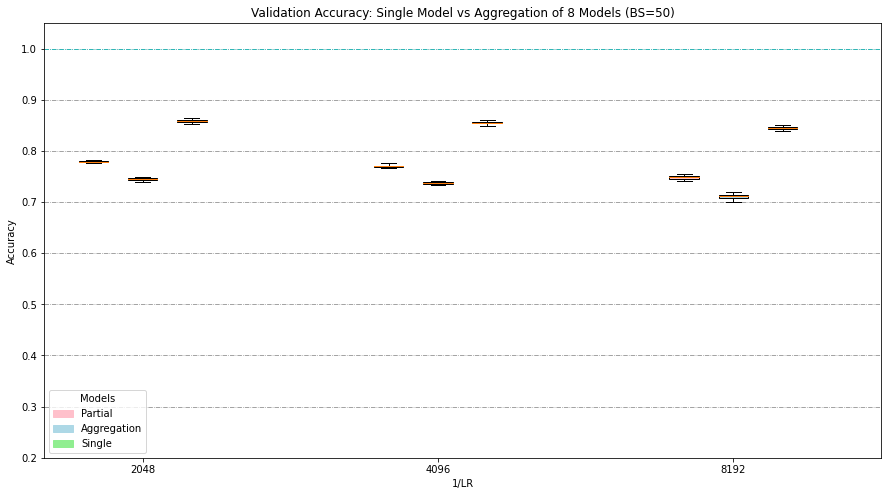

In [17]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot()
ax.set_title('Validation Accuracy: Single Model vs Aggregation of 8 Models (BS=50)')

accsPart128 = [accsLRPart128[lr][1] for lr in lrs]
accsAggr128 = [accsLRAggr128[lr] for lr in lrs]
accsSingle = [accsLRSingle[lr][1] for lr in lrs]

part128_plot = plt.boxplot(accsPart128, positions=np.array(np.arange(len(accsPart128)))*3.0-0.5, widths=0.3, 
                           patch_artist=True, boxprops=dict(facecolor='pink'), whis=99)
aggr128_plot = plt.boxplot(accsAggr128, positions=np.array(np.arange(len(accsAggr128)))*3.0, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=99)
single_plot = plt.boxplot(accsSingle, positions=np.array(np.arange(len(accsSingle)))*3.0+0.5, widths=0.3, 
                          patch_artist=True, boxprops=dict(facecolor='lightgreen'), whis=99)

plt.axhline(y = 1, color = 'c', linestyle = '-.', linewidth = 0.7)    
plt.xticks(np.arange(0, (len(lrs)-0.5) * 3, 3), lrs)
plt.xlim(-1, (len(lrs)-0.5)*3)

ax.set(ylabel='Accuracy', xlabel='1/LR')
plt.grid(True, axis='y', color = 'tab:gray', linestyle = '-.', linewidth = 0.7)
plt.ylim([0.2, 1.05])

part_patch = mpatches.Patch(color='pink', label='Partial')
aggr_patch = mpatches.Patch(color='lightblue', label='Aggregation')
sing_patch = mpatches.Patch(color='lightgreen', label='Single')
plt.legend(handles=[part_patch, aggr_patch, sing_patch], loc=3, title='Models')

plt.show()

In [18]:
means_aggr_128 = [np.mean(accsLRAggr128[lr]) for lr in lrs]
var_aggr_128 = [np.var(accsLRAggr128[lr]) for lr in lrs]

print("Mean 128 aggregated models: " + str(means_aggr_128))
print("Variance 128 aggregated models: " + str(var_aggr_128))

diff = []
for i in range(len(means_single)):
    diff.append(np.subtract(means_aggr_64[i], means_single[i]))

print("Difference Single vs. 128 aggregated models: " + str(diff))

Mean 128 aggregated models: [0.7448200000000001, 0.7377720000000001, 0.7111759999999999]
Variance 128 aggregated models: [4.573200000000025e-06, 3.253615999999982e-06, 2.0138223999999948e-05]
Difference Single vs. 128 aggregated models: [-0.08123200000000019, -0.08677900000000016, -0.09601399999999993]
